# Linear Regression Exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Generating our data.

X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
Y = np.sin(X) + 0.1 * np.power(X, 2) + 0.5 * np.random.randn(100, 1)
X /= np.max(X)


X = np.hstack((np.ones_like(X), X))

In [3]:
X.shape, Y.shape

((100, 2), (100, 1))

In [4]:
order = np.random.permutation(len(X))
portion = 20

"""
    Split your data into train and test using the order and portion variable
"""
train_x = X[order[portion:]]
train_y = Y[order[portion:]]

test_x = X[order[:portion]] 
test_y = Y[order[:portion]]

In [5]:
train_x.shape, train_y.shape

((80, 2), (80, 1))

In [6]:
def get_gradient(w, x, y):
    """
        Enter code for error, mse and gradient
    """
    y_estimate = x.dot(w).flatten()
    error = y.flatten() - y_estimate
    mse = (1.0/len(x)) * np.sum(np.square(error))
    #mse = np.mean(error**2)
    gradient = (-1/len(x))*np.sum(x.T @ error)
    #gradient = (-1.0/len(x)) * error*x
    return gradient, mse

In [38]:
w = np.random.randn(2)
alpha = 0.0003


"""
    Using the get_gradient function, run the Linear regression
    use while loop
"""
thresh = 10e-8
prev_error=0
i = 0
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha*gradient
    #if (np.abs(prev_error-error) <= thresh): # comparing loss
    if (np.sum(np.abs(w-new_w)) <= thresh): # comparing weight
        break
    i += 1 
    if i% 100 == 0:
        print("Iterations: %d -Error : %.4f" %(i, error))
        
    prev_error = error
    w = new_w ## Change to your value
    
print("w =", w)
print( "Test Cost =", get_gradient(w, test_x, test_y)[1])

Iterations: 100 -Error : 12.9461
Iterations: 200 -Error : 12.1245
Iterations: 300 -Error : 11.4135
Iterations: 400 -Error : 10.7981
Iterations: 500 -Error : 10.2656
Iterations: 600 -Error : 9.8048
Iterations: 700 -Error : 9.4060
Iterations: 800 -Error : 9.0609
Iterations: 900 -Error : 8.7623
Iterations: 1000 -Error : 8.5038
Iterations: 1100 -Error : 8.2801
Iterations: 1200 -Error : 8.0866
Iterations: 1300 -Error : 7.9191
Iterations: 1400 -Error : 7.7741
Iterations: 1500 -Error : 7.6487
Iterations: 1600 -Error : 7.5401
Iterations: 1700 -Error : 7.4461
Iterations: 1800 -Error : 7.3648
Iterations: 1900 -Error : 7.2945
Iterations: 2000 -Error : 7.2336
Iterations: 2100 -Error : 7.1809
Iterations: 2200 -Error : 7.1353
Iterations: 2300 -Error : 7.0958
Iterations: 2400 -Error : 7.0617
Iterations: 2500 -Error : 7.0321
Iterations: 2600 -Error : 7.0066
Iterations: 2700 -Error : 6.9844
Iterations: 2800 -Error : 6.9653
Iterations: 2900 -Error : 6.9487
Iterations: 3000 -Error : 6.9344
Iterations: 31

In [33]:
w = np.random.randn(2)#.reshape(-1,1)
alpha = 0.0003

"""
    Using the get_gradient function, run the Linear regression
    use iteration of 10000
"""
for i in range(10000):
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha*gradient
    if i% 100 == 0:
        print("Iterations: %d -Error : %.4f" %(i, error))
        
    w = new_w ## Change to your value

print("w =", w)
print( "Test Cost =", get_gradient(w, test_x, test_y)[1])

Iterations: 0 -Error : 26.0971
Iterations: 100 -Error : 23.3142
Iterations: 200 -Error : 20.9060
Iterations: 300 -Error : 18.8219
Iterations: 400 -Error : 17.0183
Iterations: 500 -Error : 15.4575
Iterations: 600 -Error : 14.1068
Iterations: 700 -Error : 12.9379
Iterations: 800 -Error : 11.9264
Iterations: 900 -Error : 11.0510
Iterations: 1000 -Error : 10.2934
Iterations: 1100 -Error : 9.6379
Iterations: 1200 -Error : 9.0705
Iterations: 1300 -Error : 8.5795
Iterations: 1400 -Error : 8.1547
Iterations: 1500 -Error : 7.7870
Iterations: 1600 -Error : 7.4688
Iterations: 1700 -Error : 7.1934
Iterations: 1800 -Error : 6.9551
Iterations: 1900 -Error : 6.7489
Iterations: 2000 -Error : 6.5704
Iterations: 2100 -Error : 6.4160
Iterations: 2200 -Error : 6.2823
Iterations: 2300 -Error : 6.1666
Iterations: 2400 -Error : 6.0665
Iterations: 2500 -Error : 5.9799
Iterations: 2600 -Error : 5.9050
Iterations: 2700 -Error : 5.8401
Iterations: 2800 -Error : 5.7839
Iterations: 2900 -Error : 5.7354
Iterations:

Plotting the Model we obtained

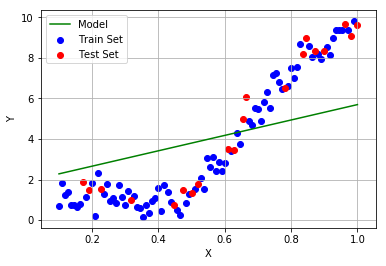

In [36]:
plt.plot(X[:,1], X.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Generate contour plot of the cost function

/usr/lib/python3/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


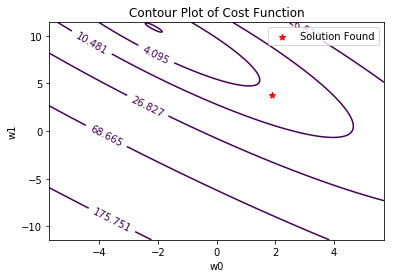

In [37]:
w1 = np.linspace(-w[1]*3, w[1]*3, 300)
w0 = np.linspace(-w[0]*3, w[0]*3, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = get_gradient(wT, train_x, train_y)[1]

plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')
CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()

Extra Exercises.

Describe what you see in the both diagrams you have.